In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:
#import clean beer reviews
br_df = pd.read_csv("../Data/Clean_data/beer_reviews_clean.csv")
br_df.head()

,Unnamed: 0,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,0,Närke Kulturbryggeri AB,Old Ale,10902.0,4.0,4.5,4.00,4.000000,4.5,8.2,57645,! (Old Ale),1.0
1,1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,4.0,4.0,4.00,4.000000,4.4,10.0,49236,"""100""",5.0
2,2,Aviator Brewing Company,American IPA,18635.0,4.0,4.0,3.50,4.000000,4.0,6.6,50696,"""100"" Pale Ale",1.0
3,3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,4.0,3.5,4.25,4.750000,4.5,9.0,44353,"""12"" Belgian Golden Strong Ale",2.0
4,4,Baltika-Baku,Dortmunder / Export Lager,13640.0,3.0,3.0,3.00,3.166667,3.0,4.8,30080,"""33"" Export",3.0


In [18]:
br_df.dtypes

Unnamed: 0             int64
brewery_name          object
beer_style            object
brewery_id           float64
review_overall       float64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
beer_abv             float64
beer_beerid            int64
beer_name             object
review_count         float64
dtype: object

In [20]:
#changing brewery_id to whole #
br_df['brewery_id'] = br_df['brewery_id'].astype(int)
br_df

,Unnamed: 0,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,0,Närke Kulturbryggeri AB,Old Ale,10902,4.000000,4.5,4.00,4.000000,4.5,8.2,57645,! (Old Ale),1.0
1,1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338,4.000000,4.0,4.00,4.000000,4.4,10.0,49236,"""100""",5.0
2,2,Aviator Brewing Company,American IPA,18635,4.000000,4.0,3.50,4.000000,4.0,6.6,50696,"""100"" Pale Ale",1.0
3,3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612,4.000000,3.5,4.25,4.750000,4.5,9.0,44353,"""12"" Belgian Golden Strong Ale",2.0
4,4,Baltika-Baku,Dortmunder / Export Lager,13640,3.000000,3.0,3.00,3.166667,3.0,4.8,30080,"""33"" Export",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48760,48827,Minipivovar Žamberk,Russian Imperial Stout,18230,3.750000,4.5,4.50,4.250000,4.0,5.5,45214,Žamberecký Kanec Imperial Stout,2.0
48761,48828,Three Floyds Brewing Co. & Brewpub,American IPA,26,4.166667,4.0,4.00,3.500000,3.5,5.0,49427,Ω-naught (Omeganaught),3.0
48762,48829,The Bobcat Café & Brewery,American IPA,7302,2.500000,2.0,4.00,3.500000,2.5,6.9,71197,“Chewy” Double IPA,1.0
48763,48830,Kamakura Beer Brewing Company,English Bitter,4973,4.000000,3.5,3.00,3.500000,3.5,5.5,70370,横須賀ビアサケ (Yokosuka Biasake),1.0


In [21]:
#see if it is indeed an int
br_df.dtypes

Unnamed: 0             int64
brewery_name          object
beer_style            object
brewery_id             int64
review_overall       float64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
beer_abv             float64
beer_beerid            int64
beer_name             object
review_count         float64
dtype: object

In [22]:
#remove Unnamed:0
br_df = br_df.drop('Unnamed: 0',1)
br_df.head()

,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid,beer_name,review_count
0,Närke Kulturbryggeri AB,Old Ale,10902,4.0,4.5,4.00,4.000000,4.5,8.2,57645,! (Old Ale),1.0
1,The Covey Restaurant & Brewery,Belgian Dark Ale,13338,4.0,4.0,4.00,4.000000,4.4,10.0,49236,"""100""",5.0
2,Aviator Brewing Company,American IPA,18635,4.0,4.0,3.50,4.000000,4.0,6.6,50696,"""100"" Pale Ale",1.0
3,Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612,4.0,3.5,4.25,4.750000,4.5,9.0,44353,"""12"" Belgian Golden Strong Ale",2.0
4,Baltika-Baku,Dortmunder / Export Lager,13640,3.0,3.0,3.00,3.166667,3.0,4.8,30080,"""33"" Export",3.0


In [33]:
#get rid of unneccesary columns
br_df_clean = br_df.drop(columns=["brewery_name","beer_style","brewery_id","review_overall","beer_beerid","beer_name","review_count"])
br_df_clean

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,4.5,4.00,4.000000,4.5,8.2
1,4.0,4.00,4.000000,4.4,10.0
2,4.0,3.50,4.000000,4.0,6.6
3,3.5,4.25,4.750000,4.5,9.0
4,3.0,3.00,3.166667,3.0,4.8
...,...,...,...,...,...
48760,4.5,4.50,4.250000,4.0,5.5
48761,4.0,4.00,3.500000,3.5,5.0
48762,2.0,4.00,3.500000,2.5,6.9
48763,3.5,3.00,3.500000,3.5,5.5


In [36]:
# Seperate features from target
y = br_df_clean["review_taste"]
X = br_df_clean.drop(columns = ["review_taste"])

In [39]:
X

,review_aroma,review_appearance,review_palate,beer_abv
0,4.5,4.00,4.000000,8.2
1,4.0,4.00,4.000000,10.0
2,4.0,3.50,4.000000,6.6
3,3.5,4.25,4.750000,9.0
4,3.0,3.00,3.166667,4.8
...,...,...,...,...
48760,4.5,4.50,4.250000,5.5
48761,4.0,4.00,3.500000,5.0
48762,2.0,4.00,3.500000,6.9
48763,3.5,3.00,3.500000,5.5


In [42]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [43]:
# Create LR model
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [44]:
print(model.coef_)
print(model.intercept_)

[0.46018049 0.05413963 0.5172752  0.00104627]
-0.09080174815432596


In [45]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_pred)
print(f"R2 score is: {score}")
print(f"Mean Squared Error is: {mean_squared_error(y_test,y_pred)}")

R2 score is: 0.7725911564049508
Mean Squared Error is: 0.08674929876961597


In [82]:
data = [br_df["review_taste"], br_df["review_aroma"]]
headers = ['review_taste','review_aroma']
taste_smell_df = pd.concat(data, axis=1, keys=headers)

taste_smell_df.head()

,review_taste,review_aroma
0,4.5,4.5
1,4.4,4.0
2,4.0,4.0
3,4.5,3.5
4,3.0,3.0


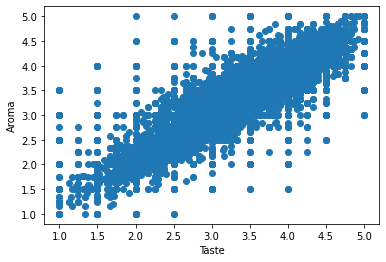

In [83]:
plt.scatter(taste_smell_df.review_taste, taste_smell_df.review_aroma)
plt.xlabel('Taste')
plt.ylabel('Aroma')
plt.show()

In [84]:
model = LinearRegression()

In [85]:
X = taste_smell_df.review_taste.values.reshape(-1, 1)

In [86]:
y = taste_smell_df['review_aroma']


In [87]:
model.fit(X, y)

LinearRegression()

In [88]:
y_pred = model.predict(X)
print(y_pred.shape)

(48765,)


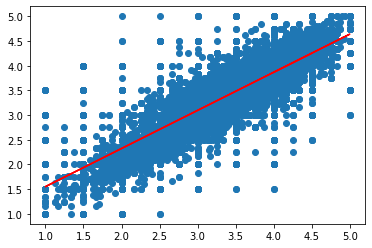

In [89]:
#Linear Regression between taste and aroma
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [90]:
print(model.coef_)
print(model.intercept_)

[0.77134583]
0.7810259469530489


In [91]:
abv_data = [br_df["review_taste"], br_df["beer_abv"]]
headers = ['review_taste','beer_abv']
taste_abv_df = pd.concat(abv_data, axis=1, keys=headers)

taste_abv_df.head()

,review_taste,beer_abv
0,4.5,8.2
1,4.4,10.0
2,4.0,6.6
3,4.5,9.0
4,3.0,4.8


In [98]:
taste_abv_df.dtypes

review_taste    float64
beer_abv        float64
dtype: object

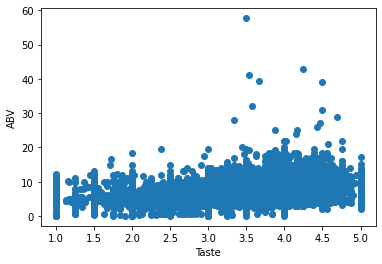

In [92]:
plt.scatter(taste_abv_df.review_taste, taste_abv_df.beer_abv)
plt.xlabel('Taste')
plt.ylabel('ABV')
plt.show()

In [93]:
abv_model = LinearRegression()

In [94]:
X = taste_abv_df.review_taste.values.reshape(-1, 1)
y = taste_abv_df['beer_abv']
abv_model.fit(X, y)
y_pred = abv_model.predict(X)
print(y_pred.shape)

(48765,)


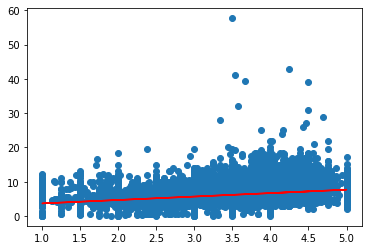

In [95]:
#Linear Regression between taste and ABV
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()